In [1]:
import pandas as pd
import numpy

In [2]:
def get_day_data(filename):
    #filename = 'sms-call-internet-tn-2013-11-1.txt'
    name = ['ID','timestamp','country code','sms in','sms out','call in','call out','traffic']
    file = pd.read_table(filename,names = name,header=None)
    return file

In [3]:
def get_day_id(file):
    ID = file.groupby('ID').sum()
    square_id = ID.index
    return square_id

In [4]:
def get_day_time_data(square_id,file):
    for i in range(len(square_id)):
        time_group = file.loc[file['ID'] == square_id[i]].groupby('timestamp').sum()
        time_group = time_group.T
        sms = time_group.iloc[2] + time_group.iloc[3]
        call = time_group.iloc[4] + time_group.iloc[5]
        sms = pd.DataFrame(sms)
        call = pd.DataFrame(call)
        sms.columns = ['sms' + str(square_id[i])]
        sms['timestamp'] = sms.index
        call.columns = ['call' + str(square_id[i])]
        call['timestamp'] = call.index
        id_data = pd.merge(sms,call,how='outer',on='timestamp')
        if i == 0:
            data = id_data
        if i != 0:
            data = pd.merge(data,id_data,how='outer',on='timestamp')
        #if i == 2:
    return data
            #break

In [5]:
filename = 'sms-call-internet-tn-2013-11-'+str(1)+'.txt'
file = get_day_data(filename)
file

,ID,timestamp,country code,sms in,sms out,call in,call out,traffic
0,10000,1383260400000,0,0.109442,NaN,NaN,0.021888,NaN
1,10000,1383260400000,39,1.000626,1.264627,0.087554,0.219587,10.168455
2,10000,1383260400000,49,NaN,NaN,NaN,NaN,0.021888
3,10000,1383261000000,0,0.193200,NaN,NaN,NaN,NaN
4,10000,1383261000000,39,0.648294,1.058651,0.175108,0.153219,11.867058
5,10000,1383261600000,0,0.104894,NaN,NaN,NaN,NaN
6,10000,1383261600000,39,1.171984,1.424300,0.184609,0.254348,12.627643
7,10000,1383262200000,0,0.066017,NaN,NaN,NaN,NaN
8,10000,1383262200000,39,0.700300,0.768250,0.109442,0.153570,13.332939
9,10000,1383262200000,49,NaN,NaN,NaN,0.021888,NaN


In [6]:
square_id = get_day_id(file)
square_id

Int64Index([   38,    39,    40,   154,   155,   156,   157,   158,   159,
              160,
            ...
            11217, 11218, 11219, 11220, 11335, 11336, 11337, 11452, 11453,
            11454],
           dtype='int64', name='ID', length=6259)

In [5]:
for i in range(1,14):
    filename = 'sms-call-internet-tn-2013-11-'+str(i)+'.txt'
    file = get_day_data(filename)
    square_id = get_day_id(file)
    data = get_day_time_data(square_id,file)
    data.to_csv('sms_call_11-'+str(i)+'.csv')
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13


In [6]:
for i in range(8,32):
    filename = 'sms-call-internet-tn-2013-12-'+str(i)+'.txt'
    file = get_day_data(filename)
    square_id = get_day_id(file)
    data = get_day_time_data(square_id,file)
    data.to_csv('sms_call_12-'+str(i)+'.csv')
    print(i)

8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31


In [19]:
data2

,sms38,timestamp,call38,sms39,call39,sms40,call40,sms154,call154,sms155,...,sms11336,call11336,sms11337,call11337,sms11452,call11452,sms11453,call11453,sms11454,call11454
0,0.101114,1383692400000,0.265553,0.160701,0.042122,0.395478,0.120890,0.060653,0.000000,0.216252,...,0.600606,0.000000,0.362246,0.000000,2.082681,0.000000,0.500817,0.003721,0.203627,0.000000
1,0.271769,1383693000000,0.000000,0.440599,0.000000,0.322312,0.028719,1.196515,0.000000,0.834503,...,0.291635,0.009105,0.125287,0.000000,0.227914,0.453116,0.003721,0.085227,0.000000,0.000000
2,0.545086,1383693600000,0.033146,0.221039,0.168215,0.287368,0.097325,0.348010,0.348010,0.234436,...,1.218230,0.006461,0.501149,0.000000,1.895403,0.225203,0.721649,0.085227,0.000000,0.000000
3,0.323270,1383694200000,0.019763,0.028433,0.076611,0.464214,0.079169,0.000000,0.282835,0.000000,...,0.583271,0.012922,0.250574,0.000000,0.434693,0.450405,0.240810,0.170454,0.000000,0.000000
4,0.208073,1383694800000,0.000000,0.227738,0.005962,0.266201,0.052934,0.121306,0.000000,0.289763,...,0.000000,0.000000,0.000000,0.000000,1.095340,0.227914,0.000000,0.000000,0.000000,0.000000
5,0.019763,1383695400000,0.089900,0.206669,0.001222,0.610992,0.016473,0.282835,0.000000,0.470927,...,0.291635,0.000000,0.125287,0.000000,0.410388,0.093782,0.237089,0.039835,0.000000,0.000000
6,0.440935,1383696000000,0.000000,0.431489,0.032514,0.414081,0.103279,1.131340,0.000000,0.847669,...,0.002644,0.000000,0.000000,0.008556,0.410388,0.046891,0.233368,0.019918,0.000000,0.000000
7,0.000000,1383696600000,0.086219,0.121393,0.020337,0.339725,0.033513,0.000000,0.000000,0.241750,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003721,0.000000,0.000000,0.000000
8,0.014697,1383697200000,0.033146,0.128379,0.156290,1.442170,0.065830,0.000000,0.348010,0.214112,...,0.013005,0.000000,0.004102,0.008556,1.134146,0.227914,0.174183,0.000000,0.002885,0.000000
9,0.000000,1383697800000,0.000000,0.103506,0.000000,3.425551,0.193535,0.000000,0.000000,0.214112,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.227914,0.000000,0.000000,0.000000,0.000000


In [22]:
data3.to_csv('sms_call_11-7.csv')

In [21]:
data2.to_csv('sms_call_11-6.csv')

In [12]:
f = pd.read_csv('sms_call_11-1.csv')
f

,Unnamed: 0,sms38,timestamp,call38,sms39,call39,sms40,call40,sms154,call154,...,sms11336,call11336,sms11337,call11337,sms11452,call11452,sms11453,call11453,sms11454,call11454
0,0,0.869410,1383260400000,0.033146,0.861527,0.163483,1.156612,0.096205,1.039509,0.348010,...,0.315857,0.000000,0.331997,0.000000,10.738265,0.077367,1.091103,0.019918,0.206512,0.000000
1,1,1.515360,1383261000000,0.229028,0.712392,0.254285,1.018079,0.057680,1.474828,0.630845,...,0.147432,0.006461,0.064151,0.144185,14.620614,0.453116,2.097957,0.353938,0.167953,0.495797
2,2,1.124349,1383261600000,0.014697,0.949608,0.052471,0.987878,0.202270,0.990242,0.000000,...,0.107534,0.000000,0.062895,0.000000,7.755290,0.046891,1.460230,0.023639,0.190626,0.000000
3,3,1.224805,1383262200000,0.176119,1.002028,0.024975,1.522562,0.345709,1.948667,0.000000,...,0.095743,0.000042,0.000000,0.002051,12.726662,0.000000,1.472508,0.003725,0.000000,0.001443
4,4,0.495202,1383262800000,0.036361,0.258410,0.164061,1.059811,0.211996,0.000000,0.348010,...,0.111329,0.012922,0.335014,0.008556,7.708591,0.450405,2.235606,0.177896,0.610880,0.000000
5,5,0.703650,1383263400000,0.161691,0.577208,0.272407,1.039506,0.217826,1.414175,0.408663,...,0.029960,0.006461,0.000000,0.000000,3.438691,0.225203,0.840393,0.085227,0.000000,0.000000
6,6,0.754377,1383264000000,0.000000,0.096193,0.044439,0.801544,0.403039,0.000000,0.000000,...,0.019383,0.006461,0.104577,0.101376,3.497246,0.225203,1.212833,0.254748,0.378368,0.290230
7,7,0.671399,1383264600000,0.000000,0.694680,0.001231,1.011924,0.241644,1.414175,0.000000,...,0.023499,0.012922,0.000000,0.024544,0.818992,0.682875,0.230206,0.332562,0.000000,0.050523
8,8,0.823801,1383265200000,0.000000,0.094764,0.039708,0.748526,0.312641,0.000000,0.000000,...,0.019682,0.000000,0.104577,0.024544,1.646118,0.227914,0.383424,0.041018,0.378368,0.050523
9,9,0.988875,1383265800000,0.033146,0.110379,0.157521,0.720393,0.090664,0.000000,0.348010,...,0.051987,0.006461,0.000000,0.052289,2.334815,0.225203,0.634587,0.172712,0.000000,0.189184


In [26]:
data1 = pd.read_csv('sms_call_11-1.csv')
data2 = pd.read_csv('sms_call_11-2.csv')
data3 = pd.read_csv('sms_call_11-3.csv')
data4 = pd.read_csv('sms_call_11-4.csv')
data5 = pd.read_csv('sms_call_11-5.csv')
data6 = pd.read_csv('sms_call_11-6.csv')
data7 = pd.read_csv('sms_call_11-7.csv')

In [27]:
data1

,Unnamed: 0,sms38,timestamp,call38,sms39,call39,sms40,call40,sms154,call154,...,sms11336,call11336,sms11337,call11337,sms11452,call11452,sms11453,call11453,sms11454,call11454
0,0,0.869410,1383260400000,0.033146,0.861527,0.163483,1.156612,0.096205,1.039509,0.348010,...,0.315857,0.000000,0.331997,0.000000,10.738265,0.077367,1.091103,0.019918,0.206512,0.000000
1,1,1.515360,1383261000000,0.229028,0.712392,0.254285,1.018079,0.057680,1.474828,0.630845,...,0.147432,0.006461,0.064151,0.144185,14.620614,0.453116,2.097957,0.353938,0.167953,0.495797
2,2,1.124349,1383261600000,0.014697,0.949608,0.052471,0.987878,0.202270,0.990242,0.000000,...,0.107534,0.000000,0.062895,0.000000,7.755290,0.046891,1.460230,0.023639,0.190626,0.000000
3,3,1.224805,1383262200000,0.176119,1.002028,0.024975,1.522562,0.345709,1.948667,0.000000,...,0.095743,0.000042,0.000000,0.002051,12.726662,0.000000,1.472508,0.003725,0.000000,0.001443
4,4,0.495202,1383262800000,0.036361,0.258410,0.164061,1.059811,0.211996,0.000000,0.348010,...,0.111329,0.012922,0.335014,0.008556,7.708591,0.450405,2.235606,0.177896,0.610880,0.000000
5,5,0.703650,1383263400000,0.161691,0.577208,0.272407,1.039506,0.217826,1.414175,0.408663,...,0.029960,0.006461,0.000000,0.000000,3.438691,0.225203,0.840393,0.085227,0.000000,0.000000
6,6,0.754377,1383264000000,0.000000,0.096193,0.044439,0.801544,0.403039,0.000000,0.000000,...,0.019383,0.006461,0.104577,0.101376,3.497246,0.225203,1.212833,0.254748,0.378368,0.290230
7,7,0.671399,1383264600000,0.000000,0.694680,0.001231,1.011924,0.241644,1.414175,0.000000,...,0.023499,0.012922,0.000000,0.024544,0.818992,0.682875,0.230206,0.332562,0.000000,0.050523
8,8,0.823801,1383265200000,0.000000,0.094764,0.039708,0.748526,0.312641,0.000000,0.000000,...,0.019682,0.000000,0.104577,0.024544,1.646118,0.227914,0.383424,0.041018,0.378368,0.050523
9,9,0.988875,1383265800000,0.033146,0.110379,0.157521,0.720393,0.090664,0.000000,0.348010,...,0.051987,0.006461,0.000000,0.052289,2.334815,0.225203,0.634587,0.172712,0.000000,0.189184


In [33]:
y = list(data1['sms11336'])
y.extend(data2['sms11336'])
y.extend(data3['sms11336'])
y.extend(data4['sms11336'])
y.extend(data5['sms11336'])
y.extend(data6['sms11336'])
y.extend(data7['sms11336'])
len(y)

1008

In [34]:
y1 = list(data1['call11336'])
y1.extend(data2['call11336'])
y1.extend(data3['call11336'])
y1.extend(data4['call11336'])
y1.extend(data5['call11336'])
y1.extend(data6['call11336'])
y1.extend(data7['call11336'])
len(y1)

1008

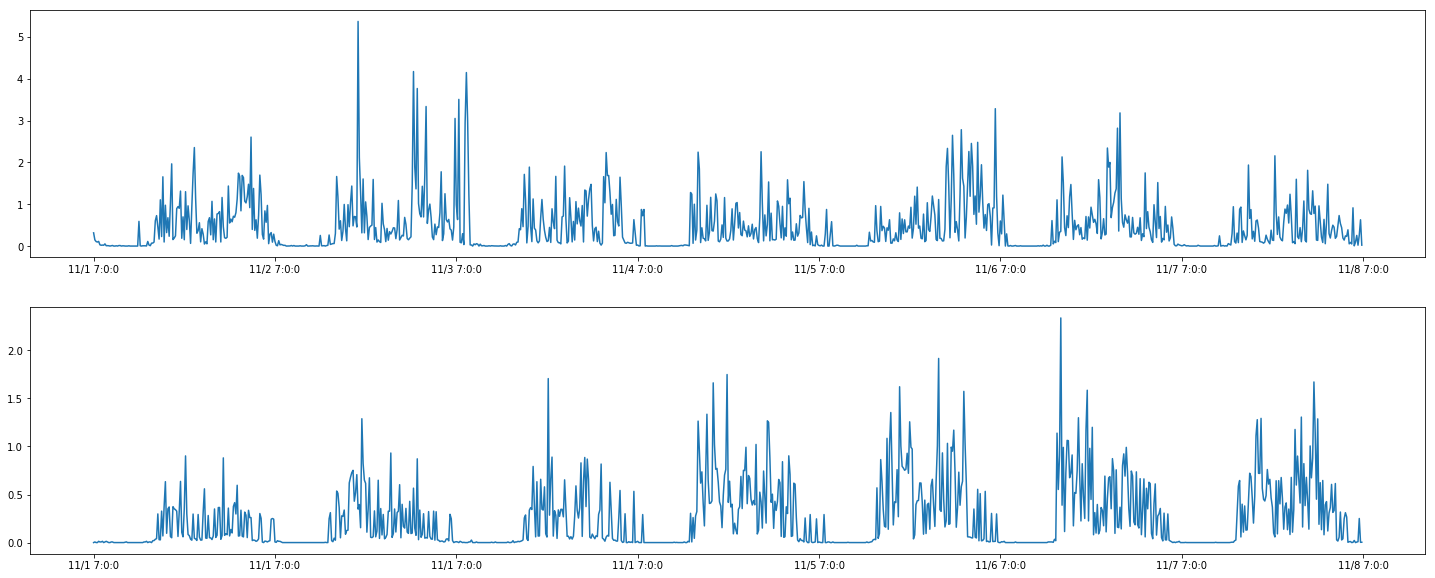

In [35]:
import matplotlib.pyplot as plt
import numpy as np
x = [i for i in range(1008)]
fig = plt.figure(figsize=(25,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.set_xticks(np.linspace(0,1008,8))
ax1.set_xticklabels(('11/1 7:0:0','11/2 7:0:0','11/3 7:0:0','11/4 7:0:0',
                    '11/5 7:0:0','11/6 7:0:0','11/7 7:0:0','11/8 7:0:0'))
ax2.set_xticks(np.linspace(0,1008,8))
ax2.set_xticklabels(('11/1 7:0:0','11/1 7:0:0','11/1 7:0:0','11/1 7:0:0',
                    '11/5 7:0:0','11/6 7:0:0','11/7 7:0:0','11/8 7:0:0'))
ax1.plot(x,y)
ax2.plot(x,y1)
plt.savefig('id_11336_sms_call.jpg')

In [68]:
y = data1.ix[:,[0]]
y

,sms38
0,0.869410
1,1.515360
2,1.124349
3,1.224805
4,0.495202
5,0.703650
6,0.754377
7,0.671399
8,0.823801
9,0.988875


Text(0.5,1,'11-1')

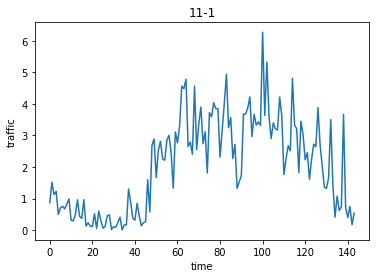

In [71]:
import pylab as pl
import matplotlib.pyplot as plt
from numpy import dtype
from numpy import datetime64
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(x,y)
plt.xlabel('time')
plt.ylabel('traffic')
plt.title('11-1')
#ax.set_xticklabels(['one','07:00','12:00','17:00','22:00','03:00','seven'])

In [10]:
ID = f.groupby('ID').sum()
ID.index

Int64Index([   38,    39,    40,   154,   155,   156,   157,   158,   159,
              160,
            ...
            11217, 11218, 11219, 11220, 11335, 11336, 11337, 11452, 11453,
            11454],
           dtype='int64', name='ID', length=6259)

In [11]:
square_id = ID.index
square_id

Int64Index([   38,    39,    40,   154,   155,   156,   157,   158,   159,
              160,
            ...
            11217, 11218, 11219, 11220, 11335, 11336, 11337, 11452, 11453,
            11454],
           dtype='int64', name='ID', length=6259)

In [22]:
time_group = f.loc[f['ID'] == 10000].groupby('时间戳').sum()

In [25]:
time_group.iloc[:,[0]] = 1000
time_group

,ID,country code,sms in,sms out,call in,call out,traffic
时间戳,,,,,,,
1383260400000,10000,88,1.110069,1.264627,0.087554,0.241476,10.190344
1383261000000,10000,39,0.841494,1.058651,0.175108,0.153219,11.867058
1383261600000,10000,39,1.276879,1.424300,0.184609,0.254348,12.627643
1383262200000,10000,88,0.766316,0.768250,0.109442,0.175459,13.332939
1383262800000,10000,39,0.745661,0.947356,0.109442,0.087554,13.949700
1383263400000,10000,39,0.660282,1.028969,0.065665,0.101172,16.753014
1383264000000,10000,88,0.797125,0.943502,0.065665,0.122581,11.909082
1383264600000,10000,39,0.729285,0.781749,0.065665,0.045240,12.936608
1383265200000,10000,82,0.963895,0.989102,0.087554,0.131331,10.778699


In [ ]:
data

In [26]:
time_group.T

时间戳,1383260400000,1383261000000,1383261600000,1383262200000,1383262800000,1383263400000,1383264000000,1383264600000,1383265200000,1383265800000,...,1383340800000,1383341400000,1383342000000,1383342600000,1383343200000,1383343800000,1383344400000,1383345000000,1383345600000,1383346200000
ID,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
country code,88.000000,39.000000,39.000000,88.000000,39.000000,39.000000,88.000000,39.000000,82.000000,39.000000,...,82.000000,39.000000,39.000000,39.000000,849.000000,88.000000,500.000000,79.000000,128.000000,79.000000
sms in,1.110069,0.841494,1.276879,0.766316,0.745661,0.660282,0.797125,0.729285,0.963895,0.692032,...,1.168401,0.252790,0.079634,0.735783,1.119269,0.568880,0.253853,0.351332,0.256428,0.222512
sms out,1.264627,1.058651,1.424300,0.768250,0.947356,1.028969,0.943502,0.781749,0.989102,0.913224,...,1.213378,0.198752,0.382393,0.486750,1.420951,0.382393,0.265529,0.612760,0.177624,0.403989
call in,0.087554,0.175108,0.184609,0.109442,0.109442,0.065665,0.065665,0.065665,0.087554,0.087554,...,0.284419,0.043777,0.044128,0.055804,0.043777,0.001942,0.043777,0.055453,0.000000,0.000000
call out,0.241476,0.153219,0.254348,0.175459,0.087554,0.101172,0.122581,0.045240,0.131331,0.262662,...,0.289085,0.089368,0.085730,0.133748,0.161402,0.021888,0.022240,0.022240,0.044128,0.000000
traffic,10.190344,11.867058,12.627643,13.332939,13.949700,16.753014,11.909082,12.936608,10.778699,13.265570,...,8.739811,9.565339,10.547628,10.274088,9.932379,11.590202,14.298964,9.704941,10.550030,11.936995


In [28]:
time_group_t = time_group.T
t = time_group_t.ix[[2,3],:]

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [30]:
t

时间戳,1383260400000,1383261000000,1383261600000,1383262200000,1383262800000,1383263400000,1383264000000,1383264600000,1383265200000,1383265800000,...,1383340800000,1383341400000,1383342000000,1383342600000,1383343200000,1383343800000,1383344400000,1383345000000,1383345600000,1383346200000
sms in,1.110069,0.841494,1.276879,0.766316,0.745661,0.660282,0.797125,0.729285,0.963895,0.692032,...,1.168401,0.252790,0.079634,0.735783,1.119269,0.568880,0.253853,0.351332,0.256428,0.222512
sms out,1.264627,1.058651,1.424300,0.768250,0.947356,1.028969,0.943502,0.781749,0.989102,0.913224,...,1.213378,0.198752,0.382393,0.486750,1.420951,0.382393,0.265529,0.612760,0.177624,0.403989


In [31]:
t = t.iloc[0] + t.iloc[1]
t

时间戳
1383260400000    2.374696
1383261000000    1.900146
1383261600000    2.701179
1383262200000    1.534566
1383262800000    1.693017
1383263400000    1.689251
1383264000000    1.740627
1383264600000    1.511034
1383265200000    1.952998
1383265800000    1.605256
1383266400000    1.699929
1383267000000    1.462857
1383267600000    1.463981
1383268200000    1.514535
1383268800000    1.329398
1383269400000    1.014777
1383270000000    1.006284
1383270600000    1.374855
1383271200000    1.196663
1383271800000    1.360446
1383272400000    1.162284
1383273000000    1.034952
1383273600000    0.725329
1383274200000    0.541688
1383274800000    0.366580
1383275400000    0.522093
1383276000000    0.569935
1383276600000    0.388820
1383277200000    0.498262
1383277800000    0.322803
                   ...   
1383328800000    4.110823
1383329400000    2.846779
1383330000000    4.702612
1383330600000    2.318979
1383331200000    2.303829
1383331800000    2.227149
1383332400000    1.984017
13833330

In [32]:
t = pd.DataFrame(t)

In [34]:
t.columns = ['sms_10000']

In [35]:
t

,sms_10000
时间戳,
1383260400000,2.374696
1383261000000,1.900146
1383261600000,2.701179
1383262200000,1.534566
1383262800000,1.693017
1383263400000,1.689251
1383264000000,1.740627
1383264600000,1.511034
1383265200000,1.952998


In [1]:
import pandas as pd

In [2]:
a = pd.read_csv('sms_call_11-1.csv')
a

,Unnamed: 0,sms38,timestamp,call38,sms39,call39,sms40,call40,sms154,call154,...,sms11336,call11336,sms11337,call11337,sms11452,call11452,sms11453,call11453,sms11454,call11454
0,0,0.869410,1383260400000,0.033146,0.861527,0.163483,1.156612,0.096205,1.039509,0.348010,...,0.315857,0.000000,0.331997,0.000000,10.738265,0.077367,1.091103,0.019918,0.206512,0.000000
1,1,1.515360,1383261000000,0.229028,0.712392,0.254285,1.018079,0.057680,1.474828,0.630845,...,0.147432,0.006461,0.064151,0.144185,14.620614,0.453116,2.097957,0.353938,0.167953,0.495797
2,2,1.124349,1383261600000,0.014697,0.949608,0.052471,0.987878,0.202270,0.990242,0.000000,...,0.107534,0.000000,0.062895,0.000000,7.755290,0.046891,1.460230,0.023639,0.190626,0.000000
3,3,1.224805,1383262200000,0.176119,1.002028,0.024975,1.522562,0.345709,1.948667,0.000000,...,0.095743,0.000042,0.000000,0.002051,12.726662,0.000000,1.472508,0.003725,0.000000,0.001443
4,4,0.495202,1383262800000,0.036361,0.258410,0.164061,1.059811,0.211996,0.000000,0.348010,...,0.111329,0.012922,0.335014,0.008556,7.708591,0.450405,2.235606,0.177896,0.610880,0.000000
5,5,0.703650,1383263400000,0.161691,0.577208,0.272407,1.039506,0.217826,1.414175,0.408663,...,0.029960,0.006461,0.000000,0.000000,3.438691,0.225203,0.840393,0.085227,0.000000,0.000000
6,6,0.754377,1383264000000,0.000000,0.096193,0.044439,0.801544,0.403039,0.000000,0.000000,...,0.019383,0.006461,0.104577,0.101376,3.497246,0.225203,1.212833,0.254748,0.378368,0.290230
7,7,0.671399,1383264600000,0.000000,0.694680,0.001231,1.011924,0.241644,1.414175,0.000000,...,0.023499,0.012922,0.000000,0.024544,0.818992,0.682875,0.230206,0.332562,0.000000,0.050523
8,8,0.823801,1383265200000,0.000000,0.094764,0.039708,0.748526,0.312641,0.000000,0.000000,...,0.019682,0.000000,0.104577,0.024544,1.646118,0.227914,0.383424,0.041018,0.378368,0.050523
9,9,0.988875,1383265800000,0.033146,0.110379,0.157521,0.720393,0.090664,0.000000,0.348010,...,0.051987,0.006461,0.000000,0.052289,2.334815,0.225203,0.634587,0.172712,0.000000,0.189184
